In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./boston.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

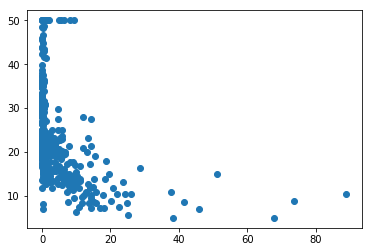

In [6]:
plt.scatter(df.CRIM,df.MEDV)

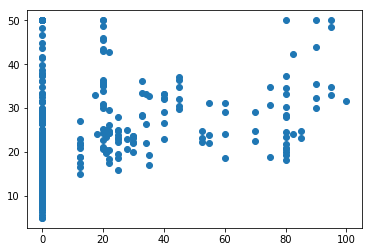

In [7]:
plt.scatter(df.ZN,df.MEDV)

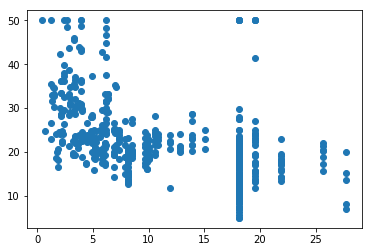

In [8]:
plt.scatter(df.INDUS,df.MEDV)

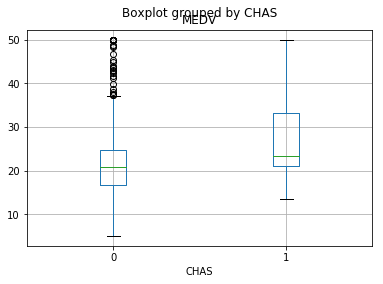

In [9]:
df.boxplot(by='CHAS',column = ['MEDV'])

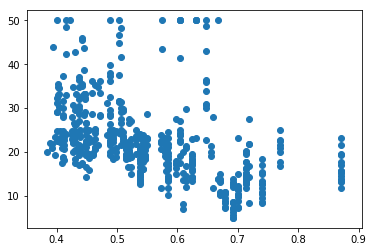

In [10]:
plt.scatter(df.NOX,df.MEDV)

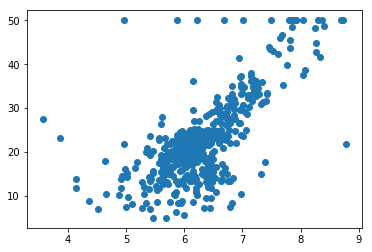

In [11]:
plt.scatter(df.RM,df.MEDV)

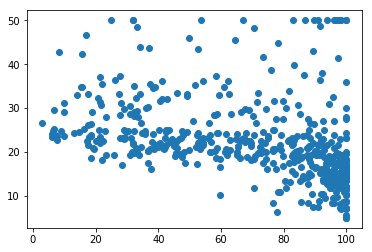

In [12]:
plt.scatter(df.AGE,df.MEDV)

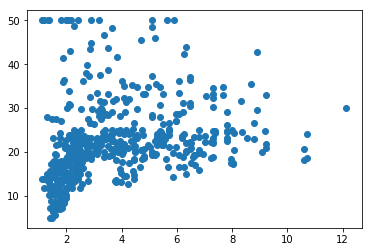

In [13]:
plt.scatter(df.DIS,df.MEDV)

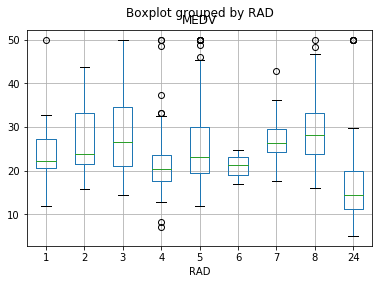

In [14]:
df.boxplot(by='RAD',column = ['MEDV'])

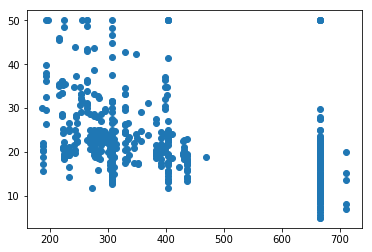

In [15]:
plt.scatter(df.TAX,df.MEDV)

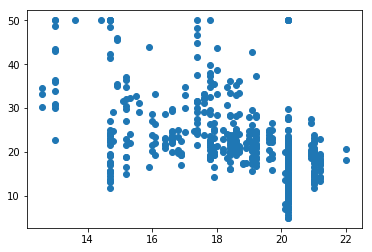

In [16]:
plt.scatter(df.PTRATIO,df.MEDV)

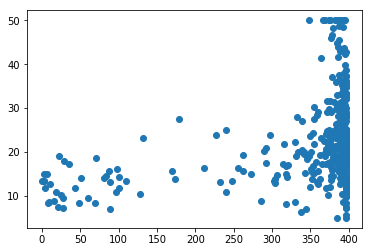

In [17]:
plt.scatter(df.B,df.MEDV)

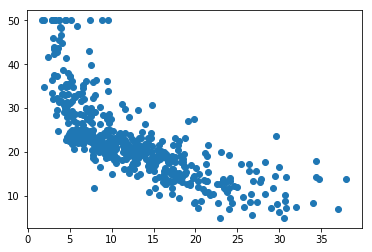

In [18]:
plt.scatter(df.LSTAT,df.MEDV)

In [146]:
dm_m = df.drop(['ZN','INDUS','AGE','MEDV'],axis=1)

In [147]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(dm_m, df.MEDV, test_size=0.4, random_state=140)

In [148]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [149]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [150]:
y_pred = lm.predict(x_test)

In [151]:
df1 = pd.DataFrame(x_train.columns,lm.coef_ )
print(df1.shape)
print(df1)

(10, 1)
                  0
-0.090711      CRIM
 2.615069      CHAS
-22.125602      NOX
 4.062767        RM
-1.297699       DIS
 0.284518       RAD
-0.010020       TAX
-0.958020   PTRATIO
 0.005477         B
-0.507383     LSTAT


In [152]:
lm.score(x_test,y_test)

0.7224598701093417

In [153]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2

,Actual,Predicted
79,20.3,23.366110
484,20.6,19.919240
394,12.7,17.690411
499,17.5,18.402290
27,14.8,15.601355
402,12.1,18.194913
492,20.1,16.192068
358,22.7,21.559186
189,34.9,33.849289
30,12.7,12.109845


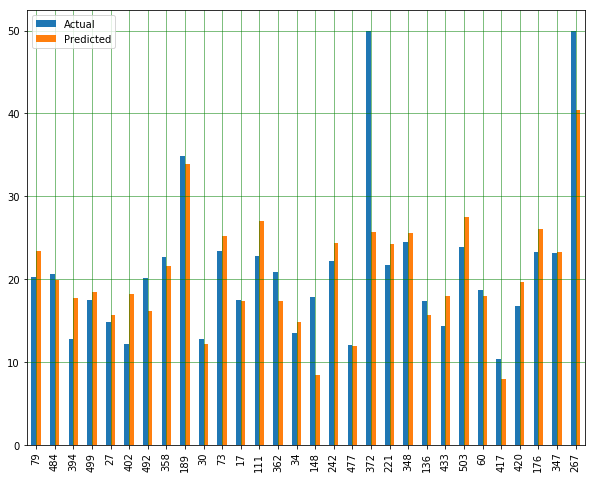

In [154]:
df3 = df2.head(30)
df3.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()